<a href="https://colab.research.google.com/github/Ludifix/Matuarbeit-Fotorealistische-Bilder-mit-Hilfe-maschinellen-Lernens-generieren/blob/master/Demo_f%C3%BCr_mein_Generative_Adversarial_Netzwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demo für Generative Adversarial Netzwork (GAN)**


## Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


## Netzwerke definieren

### Generator

In [0]:
from tensorflow.keras.layers import Dense, Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape

In [0]:
class Generator(tf.keras.Model):

    def __init__(self, random_noise_size=100):
        super().__init__(name="generator")

        # Schichten für das Netzwerk
        self.dense_1 = Dense(units=4*4*256, input_shape=(random_noise_size,))
        self.reshape_1 = Reshape((4, 4, 256))

        self.conv2dtranspose_1 = Conv2DTranspose(
            filters=128, kernel_size=5, strides=(2, 2), padding='same')
        self.batchnorm_1 = BatchNormalization()
        self.relu_1 = ReLU()

        self.conv2dtranspose_2 = Conv2DTranspose(
            filters=64, kernel_size=5, strides=(2, 2), padding='same')
        self.batchnorm_2 = BatchNormalization()
        self.relu_2 = ReLU()

        self.conv2dtranspose_3 = Conv2DTranspose(
            filters=32, kernel_size=5, strides=(2, 2), padding='same')
        self.batchnorm_3 = BatchNormalization()
        self.relu_3 = ReLU()

        self.output_layer = Conv2DTranspose(
            filters=3, kernel_size=5, strides=(2, 2), padding='same', activation='tanh')

    def call(self, input_tensor):
       # Definition des Netzwerks

        x = self.dense_1(input_tensor)
        x = self.reshape_1(x)
        # (4, 4, 256)
        x = self.conv2dtranspose_1(x)
        x = self.batchnorm_1(x)
        x = self.relu_1(x)
        # (8, 8, 128)
        x = self.conv2dtranspose_2(x)
        x = self.batchnorm_2(x)
        x = self.relu_2(x)
        # (16, 16, 64)
        x = self.conv2dtranspose_3(x)
        x = self.batchnorm_3(x)
        x = self.relu_3(x)
        # (32, 32, 32)
        x = self.output_layer(x)  # (64, 64, 3)
        return x

    def generate_noise(self, batch_size, random_noise_size):
        noise = np.random.uniform(-1, 1, size=(batch_size, random_noise_size))
        return noise


### Diskriminator

In [0]:
from tensorflow.keras.layers import Conv2D, ReLU, Flatten, Dense

In [0]:
class Discriminator(tf.keras.Model):
    def __init__(self):
        super().__init__(name="discriminator")

        # Schichten für das Netzwerk
        self.input_layer = Conv2D(filters=32, kernel_size=5, strides=(
            2, 2), padding='same', input_shape=(64, 64, 3))
        self.leaky_0 = LeakyReLU(alpha=0.2)

        self.conv2d_1 = Conv2D(filters=64, kernel_size=5,
                               strides=(2, 2), padding='same')
        self.batch_norm_1 = BatchNormalization()
        self.leaky_1 = LeakyReLU(alpha=0.2)

        self.conv2d_2 = Conv2D(filters=128, kernel_size=5,
                               strides=(2, 2), padding='same')
        self.batch_norm_2 = BatchNormalization()
        self.leaky_2 = LeakyReLU(alpha=0.2)

        self.conv2d_3 = Conv2D(filters=256, kernel_size=5,
                               strides=(2, 2), padding='same')
        self.batch_norm_3 = BatchNormalization()
        self.leaky_3 = LeakyReLU(alpha=0.2)

        self.flatten = Flatten()
        self.logits = Dense(units=1, activation='linear')

    def call(self, input_tensor):
        # Definition des Netzwerks
        x = self.input_layer(input_tensor)
        x = self.leaky_0(x)
        # (32, 32, 32)
        x = self.conv2d_1(x)
        x = self.batch_norm_1(x)
        x = self.leaky_1(x)
        # (16, 16, 64)
        x = self.conv2d_2(x)
        x = self.batch_norm_2(x)
        x = self.leaky_2(x)
        # (8, 8, 128)
        x = self.conv2d_3(x)
        x = self.batch_norm_3(x)
        x = self.leaky_3(x)
        # (4, 4, 256)
        x = self.flatten(x)
        x = self.logits(x)
        # (1, )
        return x

In [0]:
generator = Generator()
discriminator = Discriminator()

Ausgabe eines untrainierten Netzwerkes

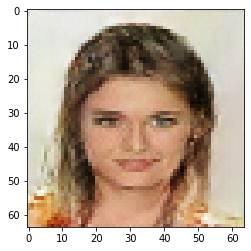

-3.1378284


In [0]:
# Testing the Generator
noise = generator.generate_noise(batch_size=1, random_noise_size=100)
fake_image = generator.predict(noise)
fake_image = (fake_image + 1) / 2
fake_image = np.clip(fake_image, 0, 1)
plt.imshow(fake_image[0], cmap=None)
plt.show()

# Testing the Discriminator
guess = discriminator.predict(fake_image)[0][0]
print(guess)

## Gewichte eines trainierten Netzwerkes laden

Nach 150 Epochen (1h 15min)

In [0]:
generator.load_weights("generator.h5")
discriminator.load_weights("discriminator.h5")

# Netzwerk ausführen

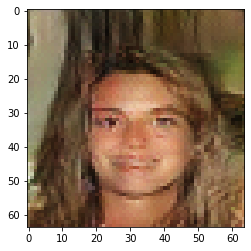

Fake
-0.74472874


In [0]:
# Testing the Generator
noise = generator.generate_noise(batch_size=1, random_noise_size=100)
fake_image = generator.predict(noise)
fake_image = (fake_image + 1) / 2
fake_image = np.clip(fake_image, 0, 1)

#plt.imshow(tf.image.resize(fake_image, (218, 178))[0], cmap=None)
plt.imshow(fake_image[0], cmap=None)
plt.show()

# Testing the Discriminator
guess = discriminator.predict(fake_image)[0][0]
print("Echt" if guess > 0 else f"Fake")
print(guess)
